# Covid-19 Country Data Plot

I made this because I was curious about seeing Brazilian data about COVID-19.
Later I plot Italy and compare both countries' data.

The countries can be changed on country1 and country2 variables.

I accept any tips or recommendations, I am starting now on using Kaggle and Python (pandas, seaborn, etc.)

Thanks

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/covid19-global-forecasting-week-3/train.csv


In [2]:
country1 = "Brazil"
country2 = "Italy"

# First country data:

In [3]:
data = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv")
data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
data = data[(data["Country_Region"] == country1) & (data["ConfirmedCases"] > 0)]
data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
2255,3246,NaN,Brazil,2020-02-26,1.0,0.0
2256,3247,NaN,Brazil,2020-02-27,1.0,0.0
2257,3248,NaN,Brazil,2020-02-28,1.0,0.0
2258,3249,NaN,Brazil,2020-02-29,2.0,0.0
2259,3250,NaN,Brazil,2020-03-01,2.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2255 to 2293
Data columns (total 6 columns):
Id                39 non-null int64
Province_State    0 non-null object
Country_Region    39 non-null object
Date              39 non-null object
ConfirmedCases    39 non-null float64
Fatalities        39 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1+ KB


In [6]:
data.drop(["Province_State", "Id", "Country_Region"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2255 to 2293
Data columns (total 3 columns):
Date              39 non-null object
ConfirmedCases    39 non-null float64
Fatalities        39 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [7]:
data.reset_index(inplace = True, drop=True)
data["Day"] = data.index + 1

In [8]:
data.head(39)

,Date,ConfirmedCases,Fatalities,Day
0,2020-02-26,1.0,0.0,1
1,2020-02-27,1.0,0.0,2
2,2020-02-28,1.0,0.0,3
3,2020-02-29,2.0,0.0,4
4,2020-03-01,2.0,0.0,5
5,2020-03-02,2.0,0.0,6
6,2020-03-03,2.0,0.0,7
7,2020-03-04,4.0,0.0,8
8,2020-03-05,4.0,0.0,9
9,2020-03-06,13.0,0.0,10


In [9]:
data["IncresedCases"] = 0
for index in range(1, len(data)):
    data.loc[index, "IncresedCases"] = data.loc[index, "ConfirmedCases"] / data.loc[index-1, "ConfirmedCases"] - 1

In [10]:
data["IncresedFatalities"] = 0
for index in range(1, len(data)):
    if data.loc[index, "Fatalities"] == 0 or data.loc[index-1, "Fatalities"] == 0:
        data.loc[index, "IncresedFatalities"] = 0
    else:
        data.loc[index, "IncresedFatalities"] = data.loc[index, "Fatalities"] / data.loc[index-1, "Fatalities"] - 1
data.head(1)

,Date,ConfirmedCases,Fatalities,Day,IncresedCases,IncresedFatalities
0,2020-02-26,1.0,0.0,1,0.0,0.0


In [11]:
data["NewCases"] = 0
for index in range(1, len(data)):
    data.loc[index, "NewCases"] = data.loc[index, "ConfirmedCases"] - data.loc[index-1, "ConfirmedCases"]

data["NewFatalities"] = 0
for index in range(1, len(data)):
    data.loc[index, "NewFatalities"] = data.loc[index, "Fatalities"] - data.loc[index-1, "Fatalities"]

# First country plots:

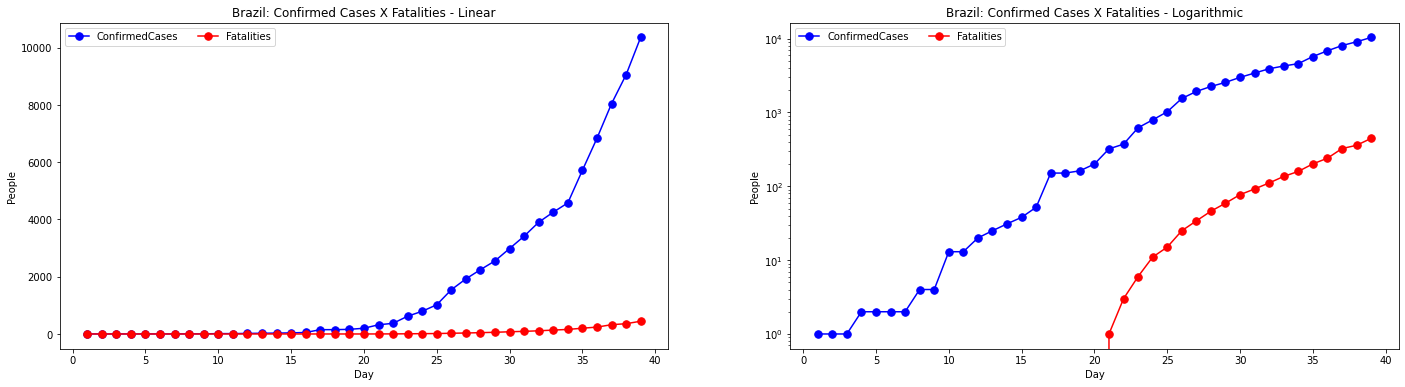

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
ax[0].plot(data["Day"],data["ConfirmedCases"], "b.-", label="ConfirmedCases", markersize=15)
ax[0].plot(data["Day"],data["Fatalities"], "r.-", label="Fatalities", markersize=15)
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country1}: Confirmed Cases X Fatalities - Linear')
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].set(yscale="log")
ax[1].plot(data["Day"],data["ConfirmedCases"], "b.-", label="ConfirmedCases", markersize=15)
ax[1].plot(data["Day"],data["Fatalities"], "r.-", label="Fatalities", markersize=15)
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country1}: Confirmed Cases X Fatalities - Logarithmic')
ax[1].legend(ncol=2, loc="upper left", frameon=True)

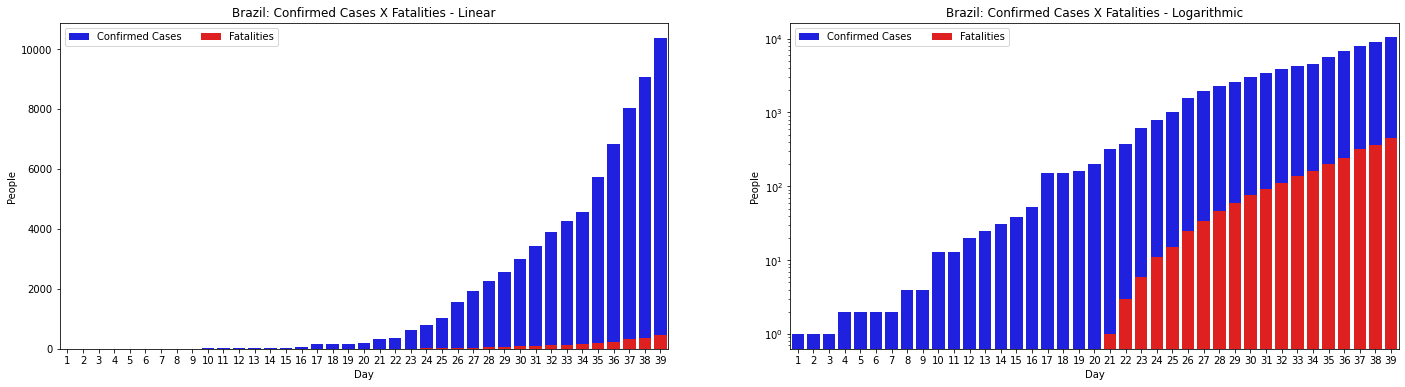

In [13]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
sns.barplot(x="Day", y="ConfirmedCases", data=data, color="b", label="Confirmed Cases", ax=ax[0])
sns.barplot(x="Day", y="Fatalities", data=data, color="r", label="Fatalities", ax=ax[0])
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country1}: Confirmed Cases X Fatalities - Linear')
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].set(yscale="log")
sns.barplot(x="Day", y="ConfirmedCases", data=data, color="b", label="Confirmed Cases")
sns.barplot(x="Day", y="Fatalities", data=data, color="r", label="Fatalities")
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country1}: Confirmed Cases X Fatalities - Logarithmic')
ax[1].legend(ncol=2, loc="upper left", frameon=True)

Text(0.5, 1.0, 'Brazil: New Confirmed Fatalities')

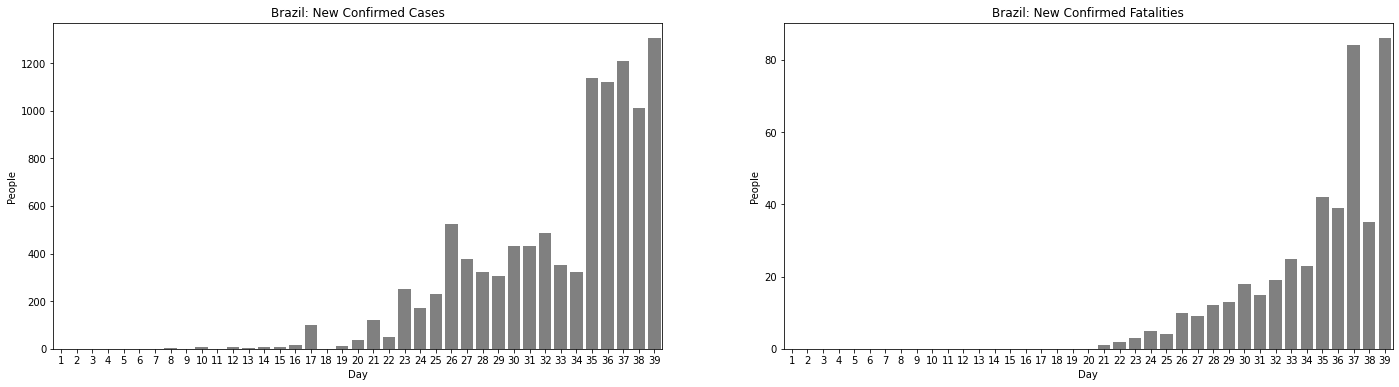

In [14]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
sns.barplot(x="Day", y="NewCases", data=data, color="#808080", label="Confirmed Cases", ax=ax[0])
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country1}: New Confirmed Cases')

sns.barplot(x="Day", y="NewFatalities", data=data, color="#808080", label="Fatalities")
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country1}: New Confirmed Fatalities')

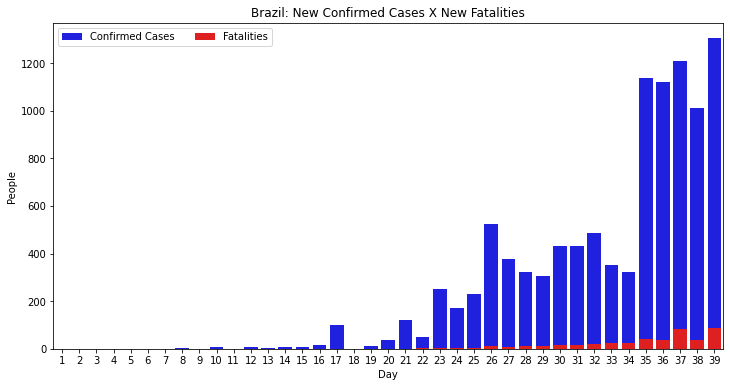

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="Day", y="NewCases", data=data, color="b", label="Confirmed Cases")
sns.barplot(x="Day", y="NewFatalities", data=data, color="r", label="Fatalities")
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1}: New Confirmed Cases X New Fatalities')
ax.legend(ncol=2, loc="upper left", frameon=True)

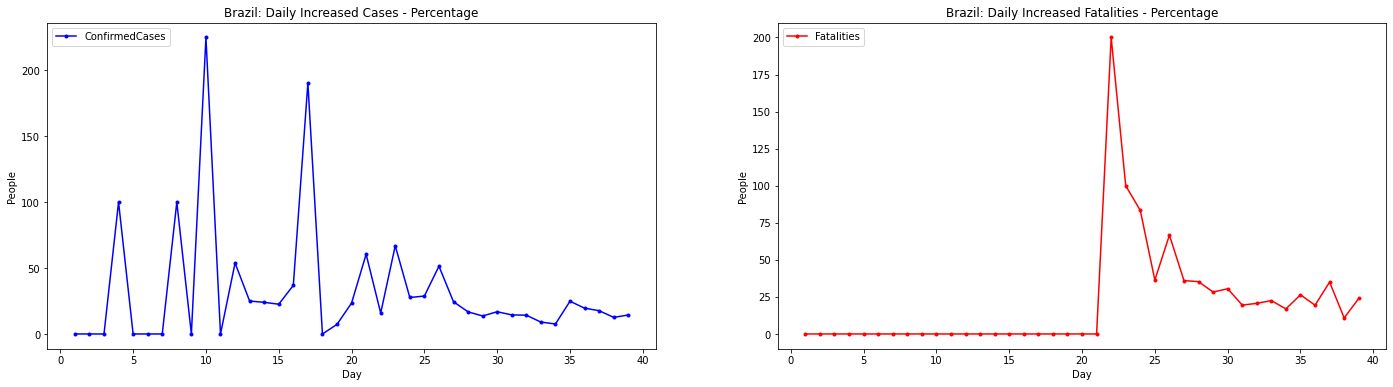

In [16]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
ax[0].plot(data["Day"],data["IncresedCases"]*100, "b.-", label="ConfirmedCases")
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country1}: Daily Increased Cases - Percentage')
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].plot(data["Day"],data["IncresedFatalities"]*100, "r.-", label="Fatalities")
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country1}: Daily Increased Fatalities - Percentage')
ax[1].legend(ncol=2, loc="upper left", frameon=True)

# Second country data:

In [17]:
data2 = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv")
data2 = data2[(data2["Country_Region"] == country2) & (data2["ConfirmedCases"] > 0)]
len(data2)
data2.head(65)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
10739,15525,NaN,Italy,2020-01-31,2.0,0.0
10740,15526,NaN,Italy,2020-02-01,2.0,0.0
10741,15527,NaN,Italy,2020-02-02,2.0,0.0
10742,15528,NaN,Italy,2020-02-03,2.0,0.0
10743,15529,NaN,Italy,2020-02-04,2.0,0.0
...,...,...,...,...,...,...
10799,15585,NaN,Italy,2020-03-31,105792.0,12428.0
10800,15586,NaN,Italy,2020-04-01,110574.0,13155.0
10801,15587,NaN,Italy,2020-04-02,115242.0,13915.0
10802,15588,NaN,Italy,2020-04-03,119827.0,14681.0


In [18]:
data2.reset_index(inplace = True, drop=True)
data2["Day"] = data2.index + 1
data2["IncresedCases"] = 0
for index in range(1, len(data2)):
    data2.loc[index, "IncresedCases"] = data2.loc[index, "ConfirmedCases"] / data2.loc[index-1, "ConfirmedCases"] - 1

data2["IncresedFatalities"] = 0 
for index in range(1, len(data2)):     
    if data2.loc[index, "Fatalities"] == 0 or data2.loc[index-1, "Fatalities"] == 0:         
        data2.loc[index, "IncresedFatalities"] = 0     
    else:         
        data2.loc[index, "IncresedFatalities"] = data2.loc[index, "Fatalities"] / data2.loc[index-1, "Fatalities"] - 1

data2["NewCases"] = 0
for index in range(1, len(data2)):
    data2.loc[index, "NewCases"] = data2.loc[index, "ConfirmedCases"] - data2.loc[index-1, "ConfirmedCases"]

data2["NewFatalities"] = 0
for index in range(1, len(data2)):
    data2.loc[index, "NewFatalities"] = data2.loc[index, "Fatalities"] - data2.loc[index-1, "Fatalities"]
    
data2.head(10)



,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Day,IncresedCases,IncresedFatalities,NewCases,NewFatalities
0,15525,NaN,Italy,2020-01-31,2.0,0.0,1,0.0,0.0,0.0,0.0
1,15526,NaN,Italy,2020-02-01,2.0,0.0,2,0.0,0.0,0.0,0.0
2,15527,NaN,Italy,2020-02-02,2.0,0.0,3,0.0,0.0,0.0,0.0
3,15528,NaN,Italy,2020-02-03,2.0,0.0,4,0.0,0.0,0.0,0.0
4,15529,NaN,Italy,2020-02-04,2.0,0.0,5,0.0,0.0,0.0,0.0
5,15530,NaN,Italy,2020-02-05,2.0,0.0,6,0.0,0.0,0.0,0.0
6,15531,NaN,Italy,2020-02-06,2.0,0.0,7,0.0,0.0,0.0,0.0
7,15532,NaN,Italy,2020-02-07,3.0,0.0,8,0.5,0.0,1.0,0.0
8,15533,NaN,Italy,2020-02-08,3.0,0.0,9,0.0,0.0,0.0,0.0
9,15534,NaN,Italy,2020-02-09,3.0,0.0,10,0.0,0.0,0.0,0.0


In [19]:
data2.drop(["Province_State", "Id", "Country_Region"], axis=1, inplace=True)
data2.tail(10)


,Date,ConfirmedCases,Fatalities,Day,IncresedCases,IncresedFatalities,NewCases,NewFatalities
55,2020-03-26,80589.0,8215.0,56,0.083389,0.094895,6203.0,712.0
56,2020-03-27,86498.0,9134.0,57,0.073323,0.111869,5909.0,919.0
57,2020-03-28,92472.0,10023.0,58,0.069065,0.097329,5974.0,889.0
58,2020-03-29,97689.0,10779.0,59,0.056417,0.075427,5217.0,756.0
59,2020-03-30,101739.0,11591.0,60,0.041458,0.075332,4050.0,812.0
60,2020-03-31,105792.0,12428.0,61,0.039837,0.072211,4053.0,837.0
61,2020-04-01,110574.0,13155.0,62,0.045202,0.058497,4782.0,727.0
62,2020-04-02,115242.0,13915.0,63,0.042216,0.057773,4668.0,760.0
63,2020-04-03,119827.0,14681.0,64,0.039786,0.055049,4585.0,766.0
64,2020-04-04,124632.0,15362.0,65,0.040099,0.046386,4805.0,681.0


# Second Country Plot:

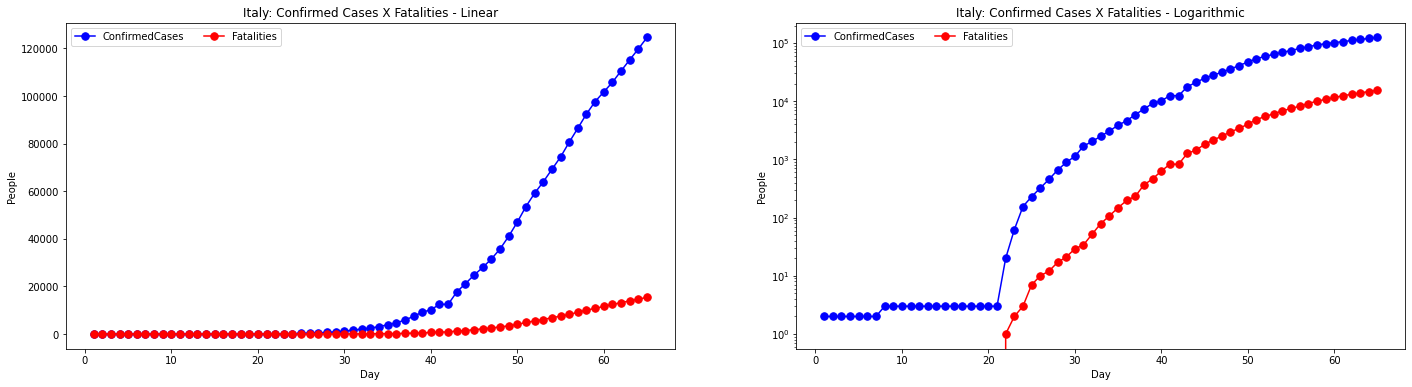

In [20]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
ax[0].plot(data2["Day"],data2["ConfirmedCases"], "b.-", label="ConfirmedCases", markersize=15)
ax[0].plot(data2["Day"],data2["Fatalities"], "r.-", label="Fatalities", markersize=15)
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country2}: Confirmed Cases X Fatalities - Linear')
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].set(yscale="log")
ax[1].plot(data2["Day"],data2["ConfirmedCases"], "b.-", label="ConfirmedCases", markersize=15)
ax[1].plot(data2["Day"],data2["Fatalities"], "r.-", label="Fatalities", markersize=15)
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country2}: Confirmed Cases X Fatalities - Logarithmic')
ax[1].legend(ncol=2, loc="upper left", frameon=True)

Text(0.5, 1.0, 'Italy: New Confirmed Fatalities')

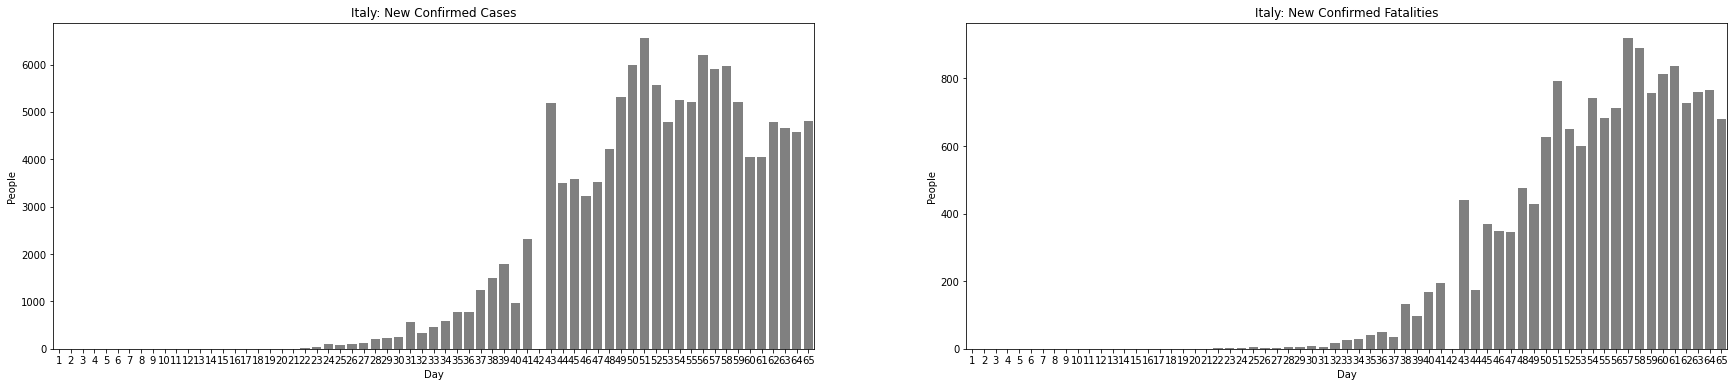

In [21]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,6))
sns.barplot(x="Day", y="NewCases", data=data2, color="#808080", label="Confirmed Cases", ax=ax[0])
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country2}: New Confirmed Cases')

sns.barplot(x="Day", y="NewFatalities", data=data2, color="#808080", label="Fatalities")
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country2}: New Confirmed Fatalities')

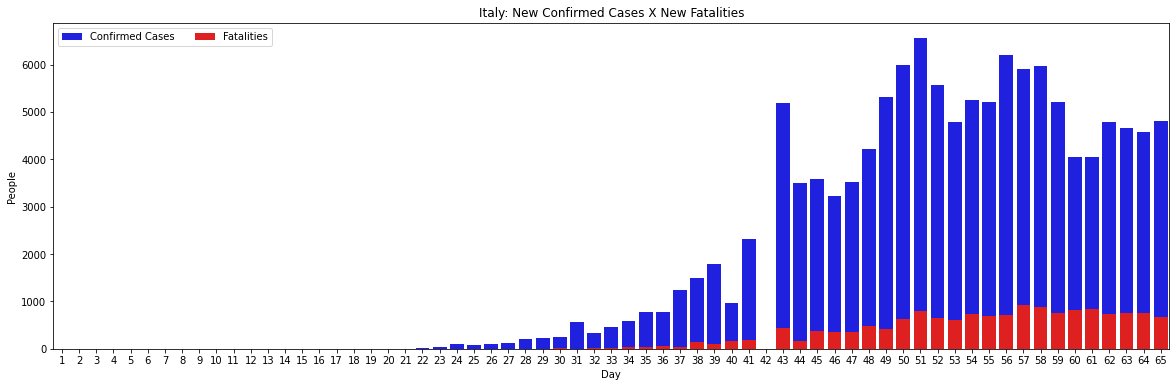

In [22]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x="Day", y="NewCases", data=data2, color="b", label="Confirmed Cases")
sns.barplot(x="Day", y="NewFatalities", data=data2, color="r", label="Fatalities")
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country2}: New Confirmed Cases X New Fatalities')
ax.legend(ncol=2, loc="upper left", frameon=True)

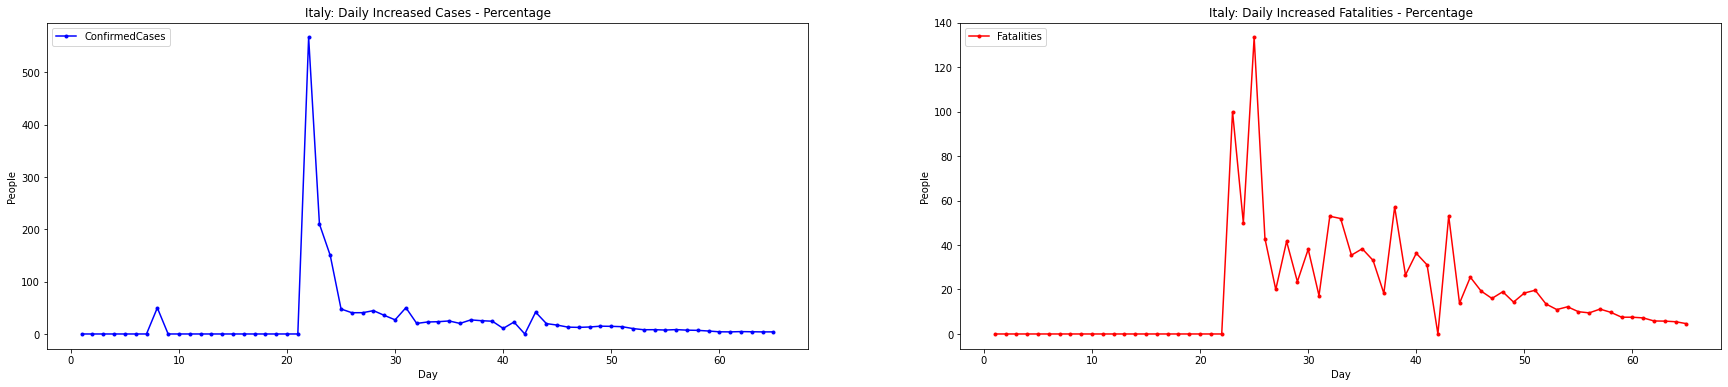

In [23]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,6))
ax[0].plot(data2["Day"],data2["IncresedCases"]*100, "b.-", label="ConfirmedCases")
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country2}: Daily Increased Cases - Percentage')
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].plot(data2["Day"],data2["IncresedFatalities"]*100, "r.-", label="Fatalities")
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country2}: Daily Increased Fatalities - Percentage')
ax[1].legend(ncol=2, loc="upper left", frameon=True)

# Comparing both countries

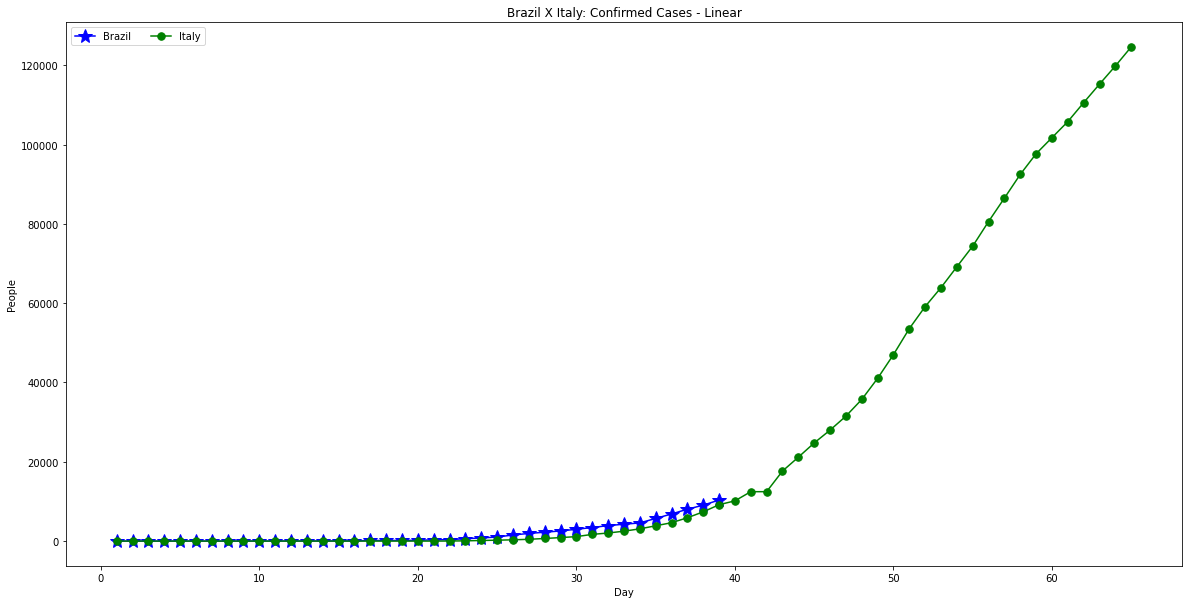

In [24]:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(data["Day"],data["ConfirmedCases"], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"],data2["ConfirmedCases"], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Confirmed Cases - Linear')
ax.legend(ncol=2, loc="upper left", frameon=True)

In [25]:
smallestsize = min(len(data), len(data2))
smallestsize

39

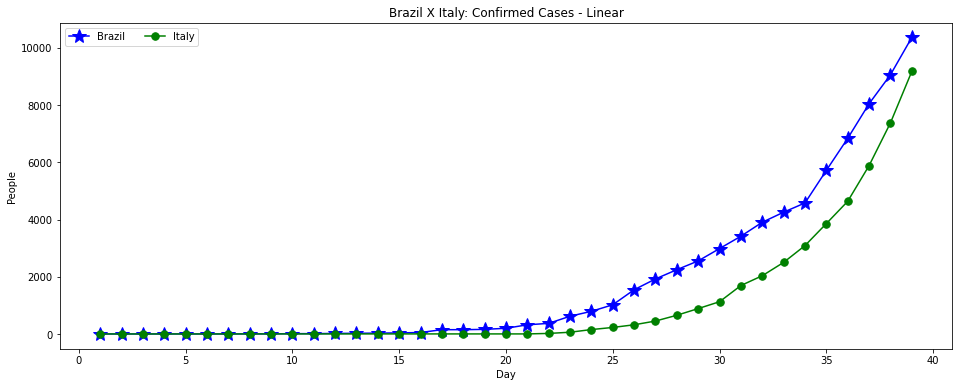

In [26]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(data["Day"][:smallestsize],data["ConfirmedCases"][:smallestsize], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"][:smallestsize],data2["ConfirmedCases"][:smallestsize], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Confirmed Cases - Linear')
ax.legend(ncol=2, loc="upper left", frameon=True)

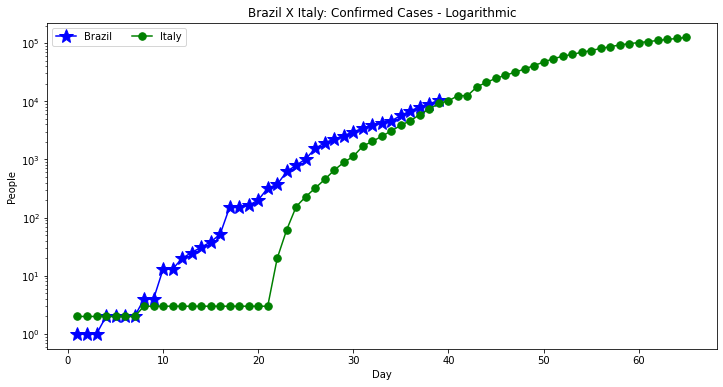

In [27]:
f, ax = plt.subplots(figsize=(12,6))
ax.set(yscale="log")
ax.plot(data["Day"],data["ConfirmedCases"], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"],data2["ConfirmedCases"], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Confirmed Cases - Logarithmic')
ax.legend(ncol=2, loc="upper left", frameon=True)

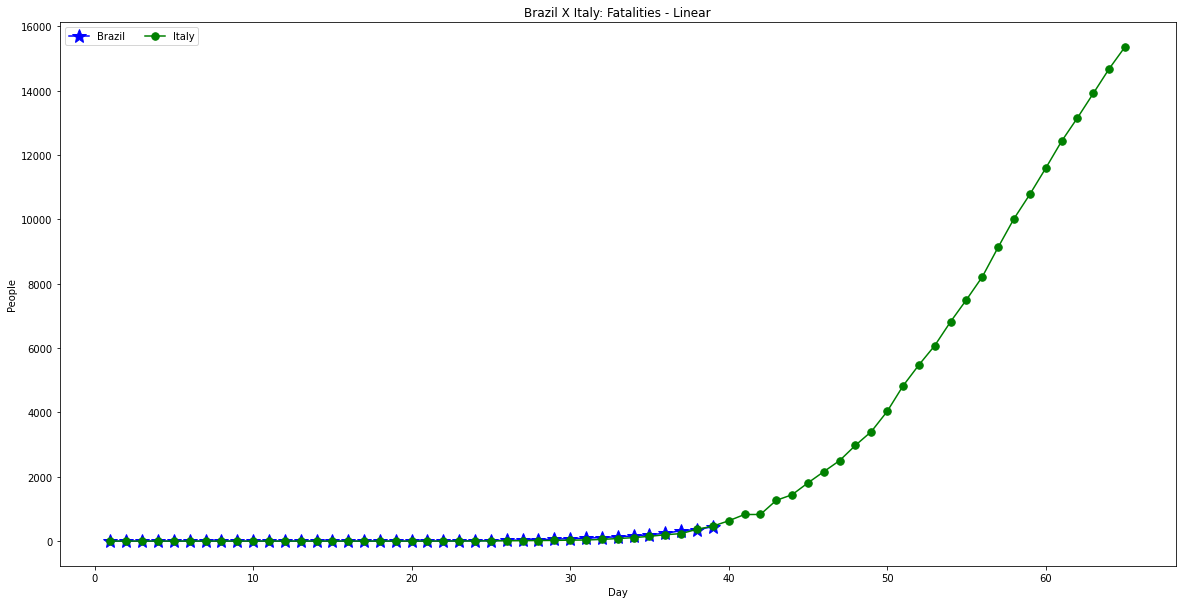

In [28]:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(data["Day"],data["Fatalities"], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"],data2["Fatalities"], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Fatalities - Linear')
ax.legend(ncol=2, loc="upper left", frameon=True)

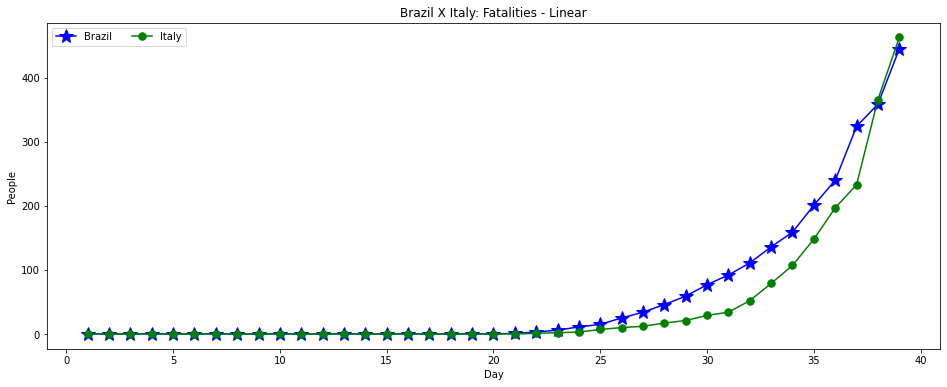

In [29]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(data["Day"][:smallestsize],data["Fatalities"][:smallestsize], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"][:smallestsize],data2["Fatalities"][:smallestsize], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Fatalities - Linear')
ax.legend(ncol=2, loc="upper left", frameon=True)

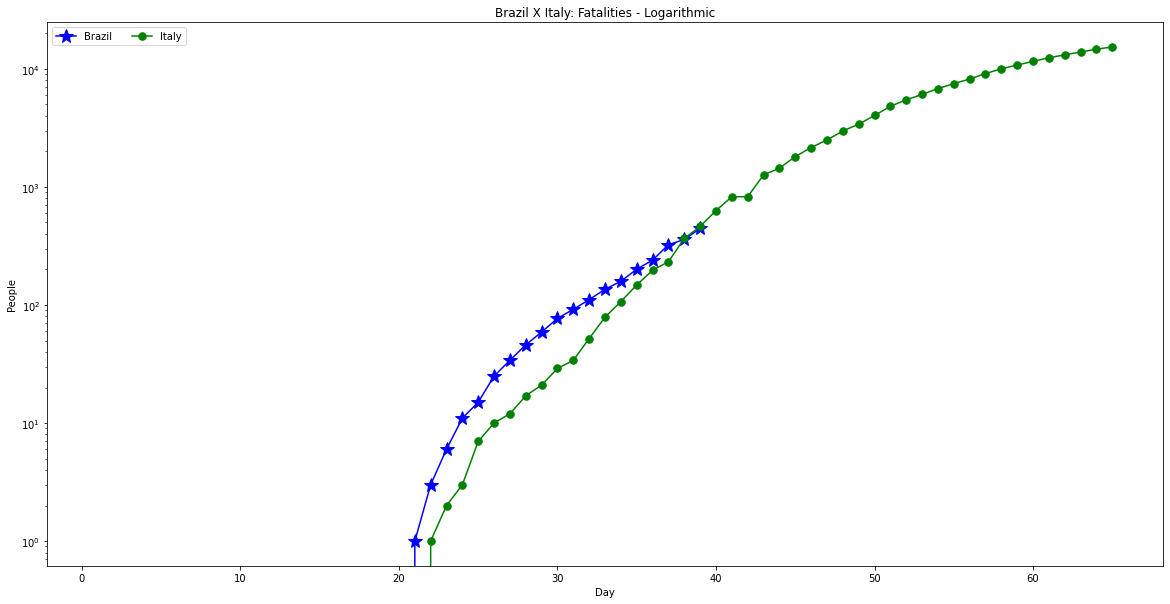

In [30]:
f, ax = plt.subplots(figsize=(20,10))
ax.set(yscale="log")
ax.plot(data["Day"],data["Fatalities"], "b*-", label=country1, markersize=15)
ax.plot(data2["Day"],data2["Fatalities"], "g.-", label=country2, markersize=15)
ax.set_xlabel('Day')
ax.set_ylabel('People')
ax.set_title(f'{country1} X {country2}: Fatalities - Logarithmic')
ax.legend(ncol=2, loc="upper left", frameon=True)

Text(0.5, 1.0, 'Brazil X Italy: New Confirmed Fatalities')

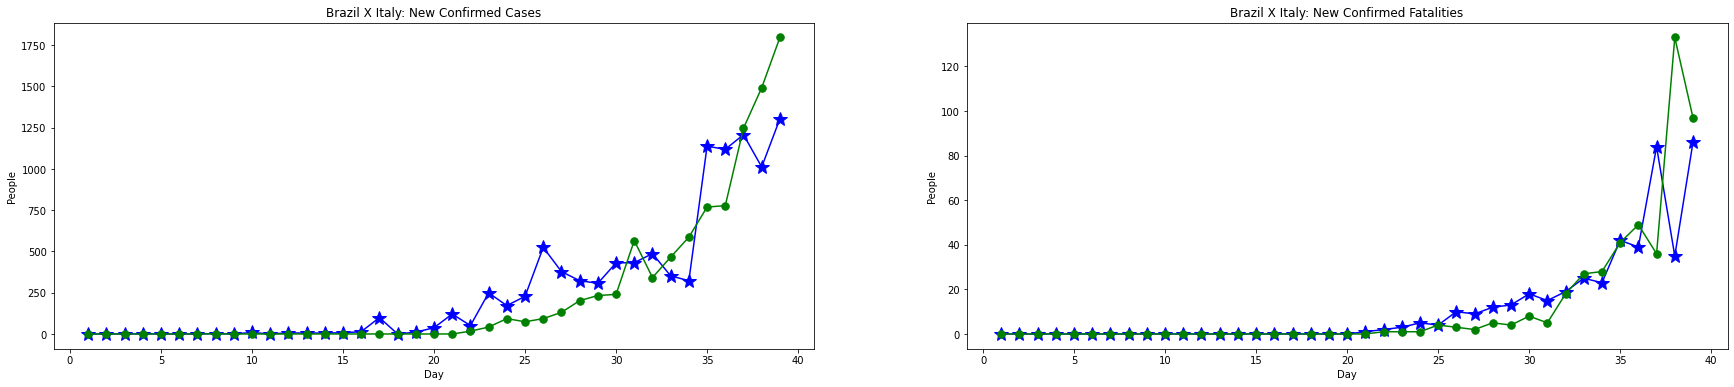

In [31]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,6))
ax[0].plot(data["Day"][:smallestsize],data["NewCases"][:smallestsize], "b*-", label=country1, markersize=15)
ax[0].plot(data2["Day"][:smallestsize],data2["NewCases"][:smallestsize], "g.-", label=country2, markersize=15)
ax[0].set_xlabel('Day')
ax[0].set_ylabel('People')
ax[0].set_title(f'{country1} X {country2}: New Confirmed Cases')

ax[1].plot(data["Day"][:smallestsize],data["NewFatalities"][:smallestsize], "b*-", label=country1, markersize=15)
ax[1].plot(data2["Day"][:smallestsize],data2["NewFatalities"][:smallestsize], "g.-", label=country2, markersize=15)
ax[1].set_xlabel('Day')
ax[1].set_ylabel('People')
ax[1].set_title(f'{country1} X {country2}: New Confirmed Fatalities')